## Using TensorFlow in Machine Learning: simple example
One of the most common uses of TensorFlow is building and training machine learning models. Let’s create a simple neural network model using TensorFlow's high-level API, Keras.

We'll build a simple model to predict y value for a given x value. I created CSV file whose x and y were populated based on a simple function 

y=2x+1.


In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd


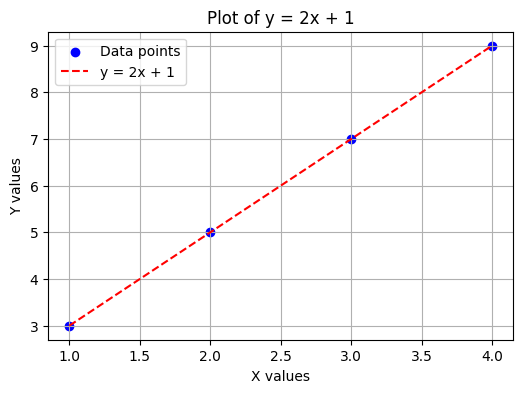

In [28]:
# Load data from CSV
df = pd.read_csv("x_y.csv")  # Replace with your actual CSV file path

# Assuming the CSV file has columns 'x' and 'y'
x = df[['x']].values.astype(np.float32)  # Extract 'x' column as NumPy array
y = df[['y']].values.astype(np.float32)  # Extract 'y' column as NumPy array

# x = np.array([[1], [2], [3], [4]], dtype=np.float32)
# y = np.array([[3], [5], [7], [9]], dtype=np.float32)  # y = 2x + 1


# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='blue', label='Data points')  # Scatter plot for points
plt.plot(x, 2*x + 1, color='red', linestyle='--', label='y = 2x + 1')  # Line

# Labels and Title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of y = 2x + 1')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Build a simple model
model = models.Sequential()
model.add(layers.Dense(1, input_dim=1))  # Single input, single output

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=100, verbose=0)

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This process took 3 minutes on CPU for 500 epochs

In [30]:
# Test data
# x_test = np.array([[1], [1.5], [2.5], [3.5], [5], [6]], dtype=np.float32) # this works too.
x_test =  np.array([1, 1.5, 2.5, 3.5, 5, 6], dtype=np.float32).reshape(-1, 1)
y_predict = model.predict(x_test)

# Compute actual y values based on equation y = 2*x + 1
y_actual = 2 * x_test + 1

# Print predictions and actual values
# print("Predictions vs Actual Values:")
# for i in range(len(x_test)):
#     print(f"x = {x_test[i][0]:.1f} | Predicted y = {y_predict[i][0]:.2f} | Actual y = {y_actual[i][0]:.2f}")
print("**************************")

# Or Create a DataFrame to store results
df_results = pd.DataFrame({
    'X': x_test.flatten(),
    'Predicted Y': y_predict.flatten(),
    'Actual Y': y_actual.flatten()
})

# Print DataFrame
print(df_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
**************************
     X  Predicted Y  Actual Y
0  1.0     2.921441       3.0
1  1.5     3.941687       4.0
2  2.5     5.982178       6.0
3  3.5     8.022671       8.0
4  5.0    11.083407      11.0
5  6.0    13.123899      13.0


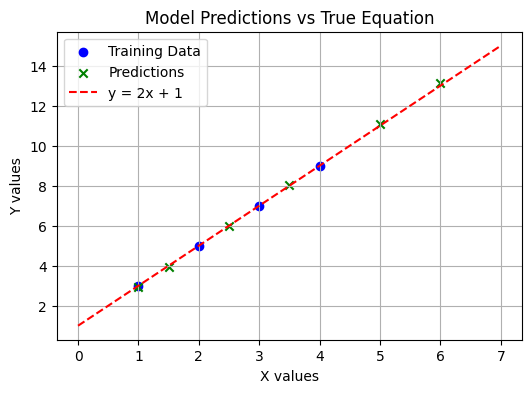

In [31]:
# Plotting
plt.figure(figsize=(6, 4))

# Scatter plot of true data
plt.scatter(x, y, color='blue', label='Training Data')

# Scatter plot of predictions
plt.scatter(x_test, y_predict, color='green', marker='x', label='Predictions')

# True equation line
x_line = np.linspace(0, 7, 100).reshape(-1, 1)  # Smoother line
y_line = 2 * x_line + 1
plt.plot(x_line, y_line, color='red', linestyle='--', label='y = 2x + 1')

# Labels and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Model Predictions vs True Equation')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Great
So we have created simple NN that has learned from data(x,y), and was able to make pretty accurate predictions on test dataset. 

In [36]:
# # Evaluate the model on test data
x_test = np.array([1, 1.5, 2.5, 3.5, 5, 6], dtype=np.float32).reshape(-1, 1)
y_test = 2 * x_test + 1  # True values based on y = 2x + 1

# Evaluate the model (returns only loss, since accuracy is not relevant for regression)
test_loss = model.evaluate(x_test, y_test, verbose=0)

# Calculate baseline MSE (predicting the mean of y_test)
y_mean = np.mean(y_test)
baseline_mse = np.mean((y_test - y_mean) ** 2)

print(f"Model MSE: {test_loss:.4f}")
print(f"Baseline MSE: {baseline_mse:.4f}")

# Check if the model performs better than the baseline
if test_loss < baseline_mse:
    print("The model performs better than the baseline.")
else:
    print("The model is not better than a simple mean predictor.")


Test Loss (MSE): 0.0055
Model MSE: 0.0055
Baseline MSE: 12.9167
✅ The model performs better than the baseline.


In [ ]:
Tensorflow does not provide its own R-square values, so lets use scikit-learn to calculate R-square.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict values
y_pred = model.predict(x_test)

# Compute errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Mean Absolute Error (MAE): 0.0641
Mean Squared Error (MSE): 0.0055
R² Score: 0.9996


R-square is looking good. So lets save the model

In [42]:
model.save("temp/model.keras")

# Load the model back if you need in future
loaded_model = tf.keras.models.load_model("temp/model.keras")

c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
